In [1]:
import pandas as pd
import torch 
import torch.nn as nn
from dnn_trainer import DeepNeuralNetwork, ModelTrainer
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
import numpy as np

In [8]:
filepath = './datasets/input_data.csv'
data = pd.read_csv(filepath, delimiter=';')#, nrows=10000)
data.drop(['date','street_id','house_id', 'postal_code','id_region'], inplace=True, axis=1)
data.dropna(subset='price', inplace=True)


In [9]:
data.head()

,price,level,levels,rooms,area,kitchen_area,geo_lat,geo_lon,building_type,object_type
0,2451300,15,31,1,30.3,0.0,56.780112,60.699355,0,2
1,1450000,5,5,1,33.0,6.0,44.608154,40.138381,0,0
2,10700000,4,13,3,85.0,12.0,55.540060,37.725112,3,0
3,3100000,3,5,3,82.0,9.0,44.608154,40.138381,0,0
4,2500000,2,3,1,30.0,9.0,44.738685,37.713668,3,2


In [20]:
# Selecting continuous features for scaling
features_to_scale = ['area', 'kitchen_area', 'geo_lat', 'geo_lon']
# Applying standardization
X_scaler = StandardScaler()
data[features_to_scale] = X_scaler.fit_transform(data[features_to_scale]) 
# Applying logarithmic transformation to the target variable
# y_scaler = RobustScaler()
# y = y_scaler.fit_transform(data[['price']].values)
data['price'] = np.log(data['price'] + 1 )

In [ ]:
data.head()

In [22]:
# Separating the target variable (y) and features (X)
y = data[['price']]
X = data.drop('price', axis=1)

X_tensor = torch.tensor(X.values, dtype=torch.float32) # for optimizing memory float32
y_tensor = torch.tensor(y.values, dtype=torch.float32)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)

# Verifying the split
X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([9086520, 9]),
 torch.Size([2271630, 9]),
 torch.Size([9086520, 1]),
 torch.Size([2271630, 1]))

In [15]:
X.describe()

,level,levels,rooms,area,kitchen_area,geo_lat,geo_lon,building_type,object_type
count,1.135815e+07,1.135815e+07,1.135815e+07,1.135815e+07,1.135815e+07,1.135815e+07,1.135815e+07,1.135815e+07,1.135815e+07
mean,6.426675e+00,1.176266e+01,1.719417e+00,4.554220e-18,-1.885747e-17,3.313070e-18,-4.336518e-17,1.017820e+00,5.275366e-01
std,5.283144e+00,7.218441e+00,1.157606e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.562077e+00,8.813503e-01
min,0.000000e+00,0.000000e+00,-1.000000e+00,-1.920624e+00,-3.002168e+00,-2.829252e+00,-1.032624e+01,0.000000e+00,0.000000e+00
25%,2.000000e+00,5.000000e+00,1.000000e+00,-6.120350e-01,8.248583e-02,-2.639833e-01,-6.711498e-01,0.000000e+00,0.000000e+00
50%,5.000000e+00,1.000000e+01,2.000000e+00,-2.360459e-01,2.829883e-01,2.712086e-01,-4.704701e-01,0.000000e+00,0.000000e+00
75%,9.000000e+00,1.700000e+01,2.000000e+00,3.647994e-01,4.063745e-01,5.388824e-01,6.033943e-01,2.000000e+00,2.000000e+00
max,5.000000e+01,5.000000e+01,9.000000e+00,1.646966e+01,1.266787e+01,4.168692e+00,5.813576e+00,6.000000e+00,2.000000e+00


In [23]:
y.describe()

,price
count,1.135815e+07
mean,1.525075e+01
std,8.942630e-01
min,0.000000e+00
25%,1.477102e+01
50%,1.520055e+01
75%,1.568731e+01
max,2.717776e+01


In [24]:
input_size = X_train.shape[1]
output_size = 1
layers = [input_size, 200, output_size]

Problem 2 Training...
	Epoch 1/25
		Loss: 0.6037, MAE: 0.3924
		Validation Loss: 0.3495
		Validation MAE: 0.3339
	Epoch 2/25
		Loss: 0.3429, MAE: 0.3316
		Validation Loss: 0.3383
		Validation MAE: 0.3206
	Epoch 3/25
		Loss: 0.3334, MAE: 0.3254
		Validation Loss: 0.3534
		Validation MAE: 0.3371
	Epoch 4/25
		Loss: 0.3311, MAE: 0.3235
		Validation Loss: 0.3287
		Validation MAE: 0.3135
	Epoch 5/25
		Loss: 0.3299, MAE: 0.3223
		Validation Loss: 0.3299
		Validation MAE: 0.3188
	Epoch 6/25
		Loss: 0.3288, MAE: 0.3212
		Validation Loss: 0.3268
		Validation MAE: 0.3110
	Epoch 7/25
		Loss: 0.3278, MAE: 0.3203
		Validation Loss: 0.3254
		Validation MAE: 0.3137
	Epoch 8/25
		Loss: 0.3257, MAE: 0.3182
		Validation Loss: 0.3331
		Validation MAE: 0.3228
	Epoch 9/25
		Loss: 0.3254, MAE: 0.3180
		Validation Loss: 0.3359
		Validation MAE: 0.3307
	Epoch 10/25
		Loss: 0.3252, MAE: 0.3177
		Validation Loss: 0.3274
		Validation MAE: 0.3130
	Epoch 11/25
		Loss: 0.3250, MAE: 0.3176
		Validation Loss: 0.3262


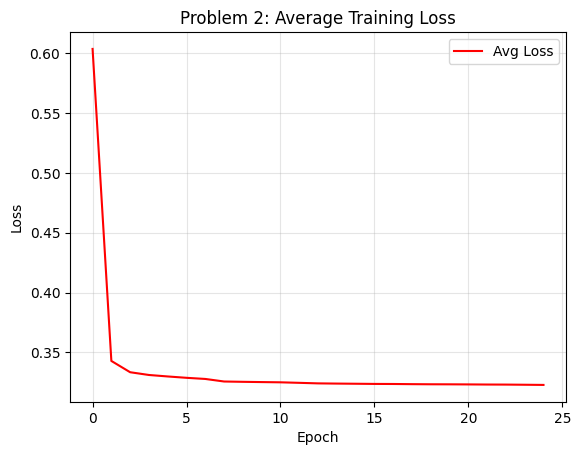

In [25]:
model = DeepNeuralNetwork(
    layers=layers, 
    activation_fn=nn.ReLU,
    output_activation_fn=None,
    init_method=None,
    output_init_method=None,
    regularization=None,
    dropout_p=None
)
# Initialize the ModelTrainer
trainer = ModelTrainer(
    model=model,
    X=X_tensor,
    y=y_tensor,
    batch_size=32,
    epochs=25,
    optimizer='Adam',
    lr=0.001,
    loss_fn='mse', # Depends on model task
    validation_split=0.2,
    test_split=0.1,
    experiment_name='Problem 2',
)

trainer.run()